<a href="https://colab.research.google.com/github/Surya-0804/Nuts-and-Bolts-of-Deep-Learning-Workshop/blob/main/Phase%20II/Nuts_and_Bolts_of_DL_(Autoencoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torch.nn import functional as F
import torchvision.transforms as transforms

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    transform = transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    transform = transforms.ToTensor(),
    download=True)


In [ ]:
input_size = 28*28
hidden_size = 700
num_classes = 10
num_epochs = 5
batch_size = 128
learning_rate = 0.001

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False)

In [ ]:
# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # Use Sigmoid for output to be in range [0, 1]
        )
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(32, 10)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

    def classify(self, x):
        encoded = self.encoder(x)
        logits = self.classifier(encoded)
        return logits

autoencoder = Autoencoder()

In [ ]:
# Loss and optimizer
reconstruction_criterion = nn.MSELoss()
classification_criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)


In [ ]:
from tqdm.notebook import tqdm
for epoch in tqdm(range(num_epochs), desc='Epochs'):
    running_loss = 0.0
    for data in tqdm(train_loader, desc='Batches', leave=False):
        img, _ = data
        img = img.view(-1, 28 * 28)  # Flatten the images

        # Forward pass
        decoded, encoded = autoencoder(img)
        loss = reconstruction_criterion(decoded, img)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch [1/5], Loss: 0.0622


Batches:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch [2/5], Loss: 0.0335


Batches:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch [3/5], Loss: 0.0270


Batches:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch [4/5], Loss: 0.0236


Batches:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch [5/5], Loss: 0.0210


In [ ]:
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(-1, 28 * 28)
        output = autoencoder(img)
        loss = criterion(output, img)
        print(f'Test Loss: {loss.item():.4f}')

Test Loss: 0.0212
Test Loss: 0.0199
Test Loss: 0.0220
Test Loss: 0.0222
Test Loss: 0.0237
Test Loss: 0.0212
Test Loss: 0.0217
Test Loss: 0.0217
Test Loss: 0.0214
Test Loss: 0.0227
Test Loss: 0.0225
Test Loss: 0.0226
Test Loss: 0.0219
Test Loss: 0.0227
Test Loss: 0.0208
Test Loss: 0.0217
Test Loss: 0.0221
Test Loss: 0.0225
Test Loss: 0.0221
Test Loss: 0.0209
Test Loss: 0.0221
Test Loss: 0.0220
Test Loss: 0.0209
Test Loss: 0.0213
Test Loss: 0.0205
Test Loss: 0.0212
Test Loss: 0.0206
Test Loss: 0.0221
Test Loss: 0.0206
Test Loss: 0.0252
Test Loss: 0.0237
Test Loss: 0.0198
Test Loss: 0.0212
Test Loss: 0.0210
Test Loss: 0.0230
Test Loss: 0.0216
Test Loss: 0.0205
Test Loss: 0.0223
Test Loss: 0.0203
Test Loss: 0.0187
Test Loss: 0.0222
Test Loss: 0.0176
Test Loss: 0.0210
Test Loss: 0.0199
Test Loss: 0.0238
Test Loss: 0.0227
Test Loss: 0.0214
Test Loss: 0.0207
Test Loss: 0.0182
Test Loss: 0.0214
Test Loss: 0.0208
Test Loss: 0.0213
Test Loss: 0.0218
Test Loss: 0.0210
Test Loss: 0.0170
Test Loss:

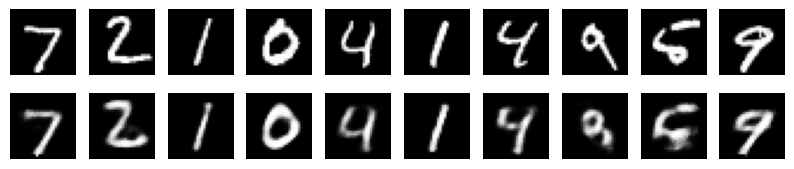

In [ ]:
import matplotlib.pyplot as plt

def visualize_results(model, data_loader, num_images=10):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for data in data_loader:
            img, _ = data
            img = img.view(-1, 28 * 28)
            output = model(img)
            output = output.view(-1, 1, 28, 28)  # Reshape output to (batch_size, 1, 28, 28)
            img = img.view(-1, 1, 28, 28)  # Reshape img to (batch_size, 1, 28, 28)
            break

    fig, axes = plt.subplots(2, num_images, figsize=(num_images, 2))
    for i in range(num_images):
        # Original images
        axes[0, i].imshow(img[i].squeeze().numpy(), cmap='gray')
        axes[0, i].axis('off')
        # Reconstructed images
        axes[1, i].imshow(output[i].squeeze().numpy(), cmap='gray')
        axes[1, i].axis('off')
    plt.show()

visualize_results(autoencoder, test_loader)


In [ ]:
# Train the classifier
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

for epoch in tqdm(range(num_epochs), desc='Epochs'):
    running_loss = 0.0
    correct = 0
    total = 0
    for data in tqdm(train_loader, desc='Batches', leave=False):
        img, labels = data
        img = img.view(-1, 28 * 28)  # Flatten the images

        # Forward pass
        logits = autoencoder.classify(img)
        loss = classification_criterion(logits, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/469 [00:00<?, ?it/s]

AttributeError: 'Autoencoder' object has no attribute 'classify'

In [ ]:
# Test the classifier
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        img, labels = data
        img = img.view(-1, 28 * 28)  # Flatten the images
        logits = autoencoder.classify(img)

        # Calculate accuracy
        _, predicted = torch.max(logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')